In [1]:
%matplotlib inline
import pandas as pd
import io, requests, os, os.path
import geopandas
import matplotlib.pyplot as plt


In [2]:
# get the tornado data from the SPC
s = requests.get('https://www.spc.noaa.gov/wcm/data/1950-2018_actual_tornadoes.csv').content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,9.5,150,2,0,1,0,0,0,0,0
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,3.6,130,1,1,1,135,0,0,0,0
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0.1,10,1,1,1,161,0,0,0,0
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,0.6,17,1,1,1,113,0,0,0,0
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,2.3,300,1,1,1,93,0,0,0,0


In [4]:
# convert the date column to date time and then restrict to the years we care about
df['date'] = pd.to_datetime(df['date'])
mask = (df['date'] >= '1979-1-1') & (df['date'] <= '2013-12-31')
df = df.loc[mask]

In [5]:
df

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
19328,1,1979,1,1,1979-01-01,14:05:00,3,FL,12,1,...,0.10,20,1,1,1,113,0,0,0,1
19329,2,1979,1,2,1979-01-02,15:00:00,3,FL,12,2,...,0.10,20,1,1,1,99,0,0,0,1
19330,3,1979,1,12,1979-01-12,14:34:00,3,FL,12,3,...,0.10,20,1,1,1,93,0,0,0,1
19331,4,1979,1,12,1979-01-12,16:20:00,3,FL,12,4,...,0.30,20,1,1,1,9,0,0,0,1
19332,5,1979,1,13,1979-01-13,04:10:00,3,FL,12,5,...,1.00,50,1,1,1,99,0,0,0,0
19333,6,1979,1,18,1979-01-18,07:02:00,3,CA,6,1,...,0.10,30,1,1,1,73,0,0,0,0
19334,7,1979,1,20,1979-01-20,02:10:00,3,TX,48,1,...,13.20,20,1,1,1,481,0,0,0,0
19335,8,1979,1,21,1979-01-21,02:10:00,3,FL,12,6,...,0.10,20,1,1,1,9,0,0,0,1
19336,9,1979,1,24,1979-01-24,01:00:00,3,FL,12,7,...,7.00,20,1,1,1,81,0,0,0,1
19337,10,1979,1,24,1979-01-24,02:30:00,3,FL,12,8,...,0.50,20,1,1,1,127,0,0,0,1


In [6]:
# make sure only years we care about are in there.. Just a double check for a worried mind!
df.yr.unique()

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013], dtype=int64)

In [7]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.slon, df.slat))

In [8]:
print(gdf.head())

       om    yr  mo  dy       date      time  tz  st  stf  stn  ...  wid  ns  \
19328   1  1979   1   1 1979-01-01  14:05:00   3  FL   12    1  ...   20   1   
19329   2  1979   1   2 1979-01-02  15:00:00   3  FL   12    2  ...   20   1   
19330   3  1979   1  12 1979-01-12  14:34:00   3  FL   12    3  ...   20   1   
19331   4  1979   1  12 1979-01-12  16:20:00   3  FL   12    4  ...   20   1   
19332   5  1979   1  13 1979-01-13  04:10:00   3  FL   12    5  ...   50   1   

       sn  sg   f1  f2  f3  f4  fc                    geometry  
19328   1   1  113   0   0   0   1  POINT (-87.15000 30.95000)  
19329   1   1   99   0   0   0   1  POINT (-80.08000 26.35000)  
19330   1   1   93   0   0   0   1  POINT (-80.82000 27.52000)  
19331   1   1    9   0   0   0   1  POINT (-80.50000 27.88000)  
19332   1   1   99   0   0   0   0  POINT (-80.05000 26.68000)  

[5 rows x 30 columns]


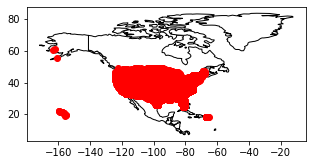

In [9]:
#f, ax = plt.subplots(1, figsize=(12, 12))
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [10]:
data = {'Lat':[49.332204, 25.60345, 25.60345, 49.332204, 49.332204], 'Lon':[-108.265141, -108.265141, -88.213196, -88.213196, -108.265141]} 
polydf = pd.DataFrame(data)
polydf.head()

,Lat,Lon
0,49.332204,-108.265141
1,25.603450,-108.265141
2,25.603450,-88.213196
3,49.332204,-88.213196
4,49.332204,-108.265141


In [11]:
gdf2 = geopandas.GeoDataFrame(
    polydf, geometry=geopandas.points_from_xy(polydf.Lon, polydf.Lat))
print(gdf2.head())

         Lat         Lon                     geometry
0  49.332204 -108.265141  POINT (-108.26514 49.33220)
1  25.603450 -108.265141  POINT (-108.26514 25.60345)
2  25.603450  -88.213196   POINT (-88.21320 25.60345)
3  49.332204  -88.213196   POINT (-88.21320 49.33220)
4  49.332204 -108.265141  POINT (-108.26514 49.33220)


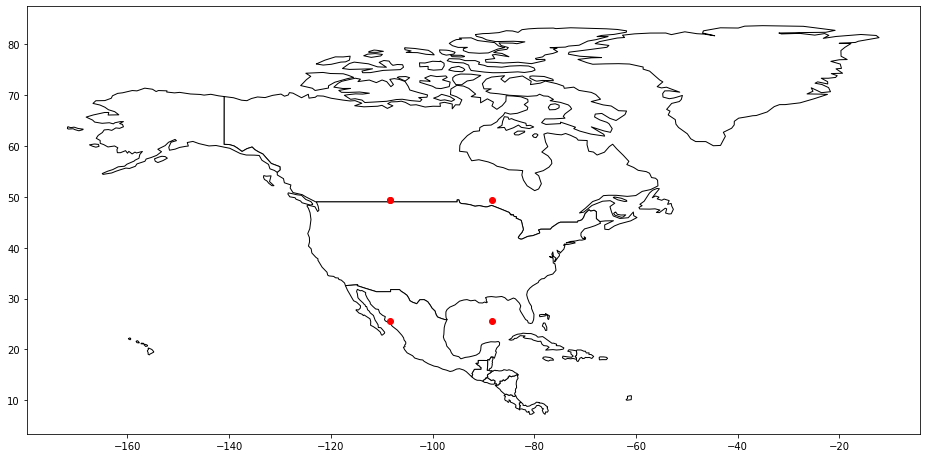

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [16]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
plt.rcParams["figure.figsize"] = [16,9]
# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf2.plot(ax=ax, color='red')

plt.show()

In [17]:
from shapely.geometry import Polygon
polygon_geom = Polygon(zip(gdf2['Lon'], gdf2['Lat']))


In [18]:
within_boundary = gdf[gdf.geometry.within(polygon_geom)]

In [19]:
print(within_boundary.head())

       om    yr  mo  dy       date      time  tz  st  stf  stn  ...  wid  ns  \
19334   7  1979   1  20 1979-01-20  02:10:00   3  TX   48    1  ...   20   1   
19344  17  1979   2  23 1979-02-23  03:15:00   3  KY   21    1  ...   30   1   
19345  18  1979   2  23 1979-02-23  09:35:00   3  TX   48    3  ...   33   1   
19346  19  1979   2  23 1979-02-23  11:30:00   3  TX   48    2  ...   10   1   
19348  21  1979   3   2 1979-03-02  14:37:00   3  TX   48    4  ...   50   1   

       sn  sg   f1   f2  f3  f4  fc                     geometry  
19334   1   1  481    0   0   0   0   POINT (-96.42000 29.23000)  
19344   1   1   35    0   0   0   0   POINT (-88.28000 36.62000)  
19345   1   1  213  423   0   0   0   POINT (-95.50000 32.15000)  
19346   1   1  289    0   0   0   0   POINT (-95.98000 31.25000)  
19348   1   1  383    0   0   0   0  POINT (-101.63000 31.03000)  

[5 rows x 30 columns]


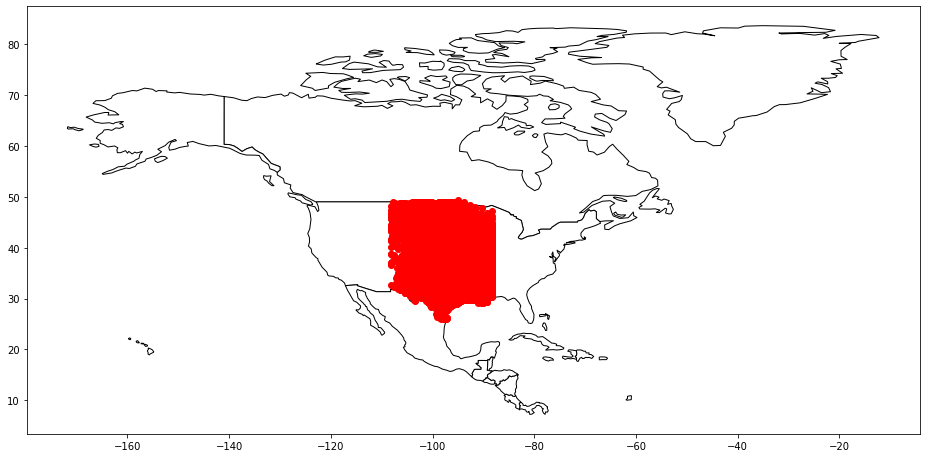

In [24]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
plt.rcParams["figure.figsize"] = [16,20]
# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
within_boundary.plot(ax=ax, color='red')

plt.show()

In [21]:
tor_counts = within_boundary.groupby('date').size()
tor_counts


date
1979-01-20     1
1979-02-23     3
1979-03-02     6
1979-03-17     1
1979-03-18    12
1979-03-19     3
1979-03-21     4
1979-03-22     1
1979-03-23     1
1979-03-26     1
1979-03-29     9
1979-03-30     1
1979-03-31     3
1979-04-01    12
1979-04-02     1
1979-04-03     1
1979-04-08    12
1979-04-10    25
1979-04-11    29
1979-04-12     1
1979-04-18     4
1979-04-19     6
1979-04-20     3
1979-04-21     1
1979-04-23     2
1979-05-01     5
1979-05-02     9
1979-05-03    25
1979-05-04     1
1979-05-05     1
              ..
2013-07-30     1
2013-08-01     2
2013-08-03     8
2013-08-05     2
2013-08-06    10
2013-08-07     2
2013-08-11     1
2013-08-12     1
2013-08-14     3
2013-08-21     1
2013-08-26     1
2013-08-29     1
2013-08-30     2
2013-08-31     1
2013-09-01     1
2013-09-11     1
2013-09-18     1
2013-09-20     4
2013-09-21     2
2013-10-03     2
2013-10-04    18
2013-10-05     2
2013-10-11     1
2013-10-12     1
2013-10-18     1
2013-10-21     1
2013-10-31    29
2013-11-1

In [22]:
idx = pd.date_range('01-01-1979', '12-31-2013')
tor_counts.index = pd.DatetimeIndex(tor_counts.index)
tor_counts = tor_counts.reindex(idx, fill_value=0)
tor_counts

1979-01-01     0
1979-01-02     0
1979-01-03     0
1979-01-04     0
1979-01-05     0
1979-01-06     0
1979-01-07     0
1979-01-08     0
1979-01-09     0
1979-01-10     0
1979-01-11     0
1979-01-12     0
1979-01-13     0
1979-01-14     0
1979-01-15     0
1979-01-16     0
1979-01-17     0
1979-01-18     0
1979-01-19     0
1979-01-20     1
1979-01-21     0
1979-01-22     0
1979-01-23     0
1979-01-24     0
1979-01-25     0
1979-01-26     0
1979-01-27     0
1979-01-28     0
1979-01-29     0
1979-01-30     0
              ..
2013-12-02     0
2013-12-03     0
2013-12-04     0
2013-12-05     0
2013-12-06     0
2013-12-07     0
2013-12-08     0
2013-12-09     0
2013-12-10     0
2013-12-11     0
2013-12-12     0
2013-12-13     0
2013-12-14     0
2013-12-15     0
2013-12-16     0
2013-12-17     0
2013-12-18     0
2013-12-19     0
2013-12-20     3
2013-12-21    11
2013-12-22     0
2013-12-23     0
2013-12-24     0
2013-12-25     0
2013-12-26     0
2013-12-27     0
2013-12-28     0
2013-12-29    

In [37]:
torCountsDF = pd.DataFrame({'date':tor_counts.index, 'count':tor_counts.values})

In [38]:
torCountsDF.head()

,date,count
0,1979-01-01,0
1,1979-01-02,0
2,1979-01-03,0
3,1979-01-04,0
4,1979-01-05,0


In [39]:
torCountsDF['date'] = pd.to_datetime(torCountsDF.date)

In [40]:
torCountsDF.sort_values(by='date', inplace=True)
torCountsDF.head()

,date,count
0,1979-01-01,0
1,1979-01-02,0
2,1979-01-03,0
3,1979-01-04,0
4,1979-01-05,0


In [42]:
torCountsDF.to_csv(r'D:\MSDS-Capstone-Project\implementation\tornadoCounts.csv')